In [11]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score, 
    recall_score, f1_score, classification_report, 
    roc_auc_score, roc_curve
)

from imblearn.over_sampling import SMOTE 

import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Input 
from tensorflow.keras.losses import BinaryCrossentropy 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import L2

In [5]:
# Load Datasets 
df = pd.read_csv(r"C:\Users\SHYAMAL RAI\Downloads\PROJECTS\2. TRANSACT GUARD - FRAUD RISK MODELING USING ML\credit_card_fraud_dataset.csv")
print(df.head())
print(df.info())
print(df.describe())

   TransactionID             TransactionDate   Amount  MerchantID  \
0              1  2024-04-03 14:15:35.462794  4189.27         688   
1              2  2024-03-19 13:20:35.462824  2659.71         109   
2              3  2024-01-08 10:08:35.462834   784.00         394   
3              4  2024-04-13 23:50:35.462850  3514.40         944   
4              5  2024-07-12 18:51:35.462858   369.07         475   

  TransactionType      Location  IsFraud  
0          refund   San Antonio        0  
1          refund        Dallas        0  
2        purchase      New York        0  
3        purchase  Philadelphia        0  
4        purchase       Phoenix        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 n

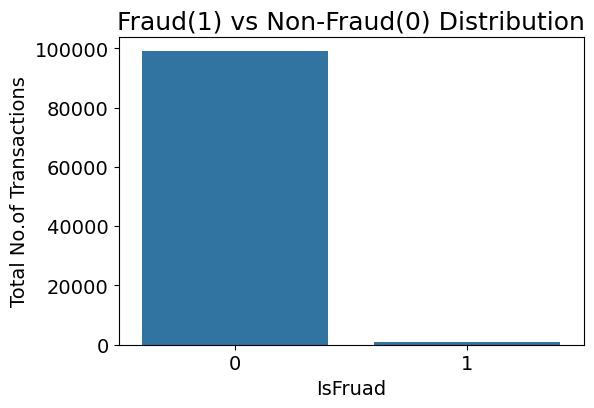

In [4]:
# Visualization 
plt.figure(figsize =(6,4))
sns.countplot(x = "IsFraud", data = df)
plt.title("Fraud(1) vs Non-Fraud(0) Distribution", fontsize = 18)
plt.xlabel("IsFruad", fontsize = 14)
plt.ylabel("Total No.of Transactions", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

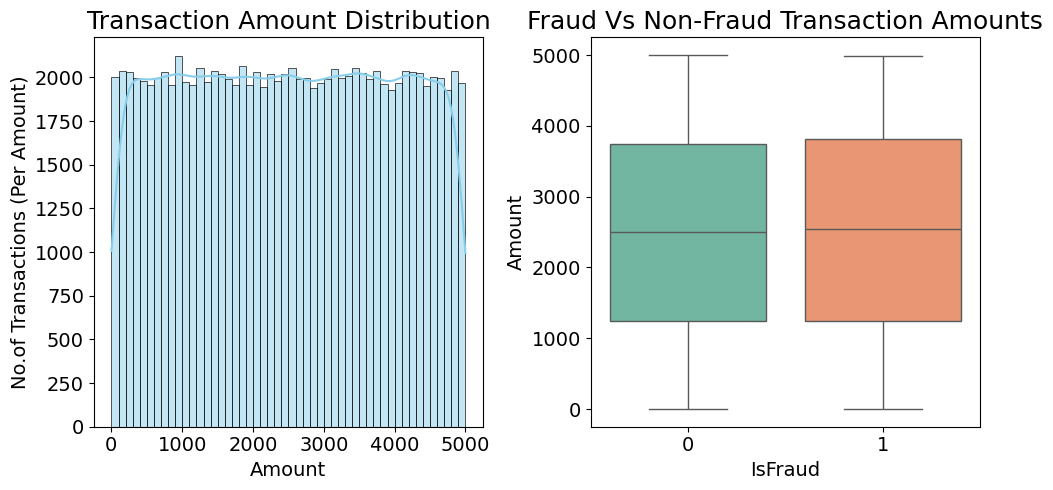

In [8]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.histplot(df["Amount"], bins = 50, kde = True, color = "skyblue")
plt.title("Transaction Amount Distribution", fontsize = 18)
plt.xlabel("Amount", fontsize = 14)
plt.ylabel("No.of Transactions (Per Amount)", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.subplot(1,2,2)
sns.boxplot(x = "IsFraud", y = "Amount", data = df, hue = "IsFraud", palette = "Set2", legend = False)
plt.title("Fraud Vs Non-Fraud Transaction Amounts", fontsize = 18)
plt.xlabel("IsFraud", fontsize = 14)
plt.ylabel("Amount", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.tight_layout()
plt.show()

In [9]:
# Data cleaning checks 

print("Missing Values:\n", df.isnull().sum())
print("Duplicate Values:\n", df.duplicated().sum())


Missing Values:
 TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
dtype: int64
Duplicate Values:
 0


In [13]:
# Convert TransactionDate to datetime 

df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])

# Extract DateTime Features 

df["Hour"]    =  df["TransactionDate"].dt.hour
df["Day"]     =  df["TransactionDate"].dt.day
df["Month"]   =  df["TransactionDate"].dt.month
df["WeekDay"] =  df["TransactionDate"].dt.weekday


# Encode Categorical Features 

le_type = LabelEncoder()
df["TransactionType"] = le_type.fit_transform(df["TransactionType"])

le_loc = LabelEncoder()
df["Location"] = le_type.fit_transform(df["Location"])

In [16]:
# Features and Target

X = df[["Amount", "MerchantID", "TransactionType", "Location", "Hour", "Day", "Month", "WeekDay"]]
Y = df["IsFraud"]

In [17]:
# Scale Numeric Features 

scaler = StandardScaler()
X[["Amount","MerchantID","Hour","Day","Month","WeekDay"]] = scaler.fit_transform(
    X[["Amount","MerchantID","Hour","Day","Month","WeekDay"]]
)



C:\Users\SHYAMAL RAI\AppData\Local\Temp\ipykernel_5896\77088813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["Amount","MerchantID","Hour","Day","Month","WeekDay"]] = scaler.fit_transform(


In [21]:
# Handle Imbalanced Data SMOTE 

smote = SMOTE(random_state = 42)
X_resampled, Y_resampled = smote.fit_resample(X,Y)

print("Original Dataset Shape", Y.value_counts())
print("Resampled Dataset Shape",Y_resampled.value_counts())


Original Dataset Shape IsFraud
0    99000
1     1000
Name: count, dtype: int64
Resampled Dataset Shape IsFraud
0    99000
1    99000
Name: count, dtype: int64


In [24]:
# Train-Test Split 

X_train,X_test,Y_train,Y_test = train_test_split(
    X,Y,test_size = 0.2, random_state = 42, stratify = Y)

In [36]:
# Logistic Regression Model 

log_reg = LogisticRegression(max_iter = 1000, class_weight = "balanced")
log_reg.fit(X_train,Y_train)

y_pred_lr = log_reg.predict(X_test)
y_pred_proba_lr = log_reg.predict_proba(X_test)[:,1]






    

In [37]:
def evaluate_model(y_true, y_pred, y_prob, model_name):
    print(f"\n=== {model_name} ===")
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("AUC-ROC:", roc_auc_score(y_true, y_prob))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

evaluate_model(Y_test, y_pred_lr, y_pred_proba_lr, "Logistic Regression")




=== Logistic Regression ===
Precision: 0.009716682008796154
Recall: 0.475
F1-score: 0.019043800741705922
AUC-ROC: 0.47456944444444443
Confusion Matrix:
 [[10118  9682]
 [  105    95]]


In [44]:
from sklearn.utils import class_weight

# -----------------------
# Compute class weights
# -----------------------
class_weights_values = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(Y_train),
    y=Y_train
)
class_weights_dict = dict(enumerate(class_weights_values))
print("Class weights:", class_weights_dict)

# -----------------------
# Neural Network Classifier (with L2 and increased capacity)
# -----------------------
nn_clf = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(1, activation='sigmoid')
])

nn_clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# -----------------------
# Train model with class weights
# -----------------------
nn_clf.fit(
    X_train, Y_train, 
    epochs=50, batch_size=32, validation_split=0.2,
    class_weight=class_weights_dict, verbose=1
)

# -----------------------
# Predictions with threshold tuning
# -----------------------
y_pred_prob_nn = nn_clf.predict(X_test).flatten()
threshold = 0.3  # lower threshold to catch more frauds
y_pred_nn = (y_pred_prob_nn > threshold).astype(int)



Class weights: {0: np.float64(0.5050505050505051), 1: np.float64(50.0)}


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.5217 - loss: 0.8965 - val_accuracy: 0.9673 - val_loss: 0.6702
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5545 - loss: 0.7151 - val_accuracy: 0.9898 - val_loss: 0.6928
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9134 - loss: 0.6946 - val_accuracy: 0.0102 - val_loss: 0.6984
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4098 - loss: 0.6919 - val_accuracy: 0.9898 - val_loss: 0.6915
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4288 - loss: 0.6918 - val_accuracy: 0.9898 - val_loss: 0.6914
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6048 - loss: 0.6918 - val_accuracy: 0.9898 - val_loss: 0.6886
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2931 - loss: 0.6918 - val_accuracy: 0.9898 - val_loss: 0.6814
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6863 - loss: 0.6918 -

In [46]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(Y_test, y_pred_prob_nn)
f1_scores = 2*precision*recall/(precision+recall+1e-6)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print("Best threshold based on F1:", best_threshold)

y_pred_nn = (y_pred_prob_nn > best_threshold).astype(int)

# -----------------------
# Evaluate model
# -----------------------
def evaluate_model(y_true, y_pred, y_prob, model_name):
    print(f"\n=== {model_name} ===")
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("AUC-ROC:", roc_auc_score(y_true, y_prob))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

evaluate_model(Y_test, y_pred_nn, y_pred_prob_nn, "Neural Network")



Best threshold based on F1: 0.4997527

=== Neural Network ===
Precision: 0.0
Recall: 0.0
F1-score: 0.0
AUC-ROC: 0.5
Confusion Matrix:
 [[19800     0]
 [  200     0]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
